<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [6]:
# Import beautifulsoup since the description is in a html format
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
# grab the csv from the current dir
import pandas as pd
df = pd.read_csv('./data/job_listings.csv')

In [20]:
# Function that grabs a string and returns the string without all the html tags
def clean_Description(desc):
    soup = BeautifulSoup(desc)
    
    return soup.get_text(strip=True)
# A new column that holds the clean strings
df['clean_desc'] = df['description'].apply(clean_Description)

In [33]:
# Checking to see if it worked
df['clean_desc'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [54]:
# Iterate through the df and only allow alphabetical strings
import re
for i in range(len(df)):
    df['clean_desc'].loc[i] = re.sub('[^a-zA-Z ]', '', df['clean_desc'].loc[i])

/home/adriann/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
# Check if everything is looking good
df.head()

,Unnamed: 0,description,title,clean_desc,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,bJob RequirementsnConceptual understanding in ...,"[requirements:\nconceptual, understanding, mac..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,bJob DescriptionnnAs a Data Scientist you wil...,"[description\n\nas, data, scientist, 1,, help,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,bAs a Data Scientist you will be working on co...,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,b a monthContractUnder the general supervisi...,"[b'$4,969, $6,756, monthcontractunder, general..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,bLocation USA xexx multiple locationsn years o...,"[b'location:, usa, \xe2\x80\x93, multiple, loc..."


## 2) Use Spacy to tokenize the listings 

In [37]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

# import spacy
import spacy
from spacy.tokenizer import Tokenizer

# load the spacy package
nlp = spacy.load("en_core_web_lg")

# Create the tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [58]:
stop_words = nlp.Defaults.stop_words.union(['b"job', "b'job", ' '])

In [59]:
# create empty list
tokens = []
# for loop that iterates through each review through the tokenizer pipeline
for doc in tokenizer.pipe(df['clean_desc']):
    # empty list to hold the list of tokens
    doc_tokens = []
    # iterate through each token in the review
    for token in doc:
        # checks to see if a token is in the stop_words list
        if ((token.text.lower() not in stop_words) and (token.is_punct == False)):
            # appends the tokens into the doc_tokens list
            doc_tokens.append(token.text.lower())
    # appends the list of tokens into the tokens list        
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [86]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a count vectorizer object
vect = CountVectorizer(stop_words='english', max_features=1000)

# fit the object onto the series that holds the cleaned job descriptions
vect.fit(list(df['clean_desc']))

# transform the data
dtm = vect.transform(list(df['clean_desc']))

# implement the data into a dataframe for readability
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [87]:
dtm.head()

,ab,abilities,ability,able,academic,accelerate,access,accommodation,accommodations,accuracy,...,write,writing,written,xexx,year,years,yearsxexx,york,youll,youxexxll
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## 4) Visualize the most common word counts

In [102]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

# create empty list to hold all sums of words 
sum_all = []

# grab the sum of all words and append it to the empty list above
for i in dtm.keys():
    sum_all.append(dtm[i].sum())

# zip the keys of the dtm df above and pair it with the sum_all list
temp = zip(dtm.keys(), sum_all)

# create a dataframe with the data above
common = pd.DataFrame(temp, columns=['word', 'count'])

# find the total
total = common['count'].sum()

# calculate the percentage of each word
common['pct_total'] = common['count'].apply(lambda x: x / total)

# sort the values by the total count
common = common.sort_values(by='count', ascending=False)

# show the edf
common.head()

,word,count,pct_total
227,data,4015,0.047495
112,business,1091,0.012906
352,experience,1007,0.011912
982,work,925,0.010942
813,science,874,0.010339


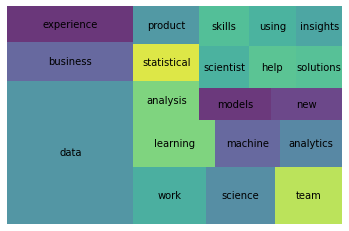

In [103]:
import squarify
import matplotlib.pyplot as plt

# only contain the top 20 words
top20 = common.head(20)

# create a squarify plot
squarify.plot(sizes=top20['pct_total'], label=top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [106]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

# Create a tokenize function to implemment lemma in the tfidf feature matrix
def tokenize(document):
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if ((token.text.lower() not in stop_words) and (token.is_punct == False)) and (token.is_punct == False)]

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the tfidf object with certain params and using the tokenize function above
tfidf = TfidfVectorizer(stop_words='english',
                      ngram_range=(1,1),
                      max_df=.97,
                      min_df=3,
                      tokenizer=tokenize)

# fit and transform the clean_desc column
dtm = tfidf.fit_transform(list(df['clean_desc']))

# create a dataframe with the tfidf values and keys for readability
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# show the df
dtm.head()

,,ab,abilitiesnproblem,ability,able,absence,absolutely,abstract,abundant,academic,...,york,younnabout,younnthe,younnwe,younnyou,younyou,youxexxll,youxexxre,youxexxve,yrs
0,0.000000,0.0,0.0,0.064423,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.030328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.135512,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [121]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.neighbors import NearestNeighbors

# create a NN model and fit the tfidf df onto it
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [122]:
# test something that has already been fit onto the model to see if it working properly
# This worked properly because index 0 matched index 0 perfectly
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.27389874, 1.2905885 , 1.31793515, 1.31956325]]),
 array([[  0, 115, 274, 366, 338]]))

In [125]:
# A random string to predict what job to pick in the list of data science jobs
test =["""
A data job that works with lots of data to analyse and clean to be used in a machine learning model. I would like to be paid the good bucks as well.
"""]

In [126]:
# transform the data onto the string above
new = tfidf.transform(test)

In [127]:
# Implement kneighbors onto it to find the closest match to what I want
nn.kneighbors(new.todense())

(array([[1.31158459, 1.31232008, 1.31521352, 1.32085171, 1.32277205]]),
 array([[ 19, 308, 143, 306, 116]]))

In [129]:
# what data science job the model predicted using the string from above
df['clean_desc'][19]

'b   a yearTitle Data AnalystJr Data ScientistnLocations Charleston SCnSalary k dependent upon experiencennQualificationsnn years of Database DevelopmentArchitecture experience SQLnExperience with Data visualization tools such as Tableau Sisense preferrednExpertise in MS ExcelnPreferrednnDegree in Computer SciencenExperience with R andor PythonnExperience working with SparknMachine Learning experiencenA bit about the companynnIn the AI spacenGreat company cultureoffice environmentnAmazing benefitsnIndustry disruptive organization'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 